In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/fandango_scrape.csv")

In [3]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


In [5]:
df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


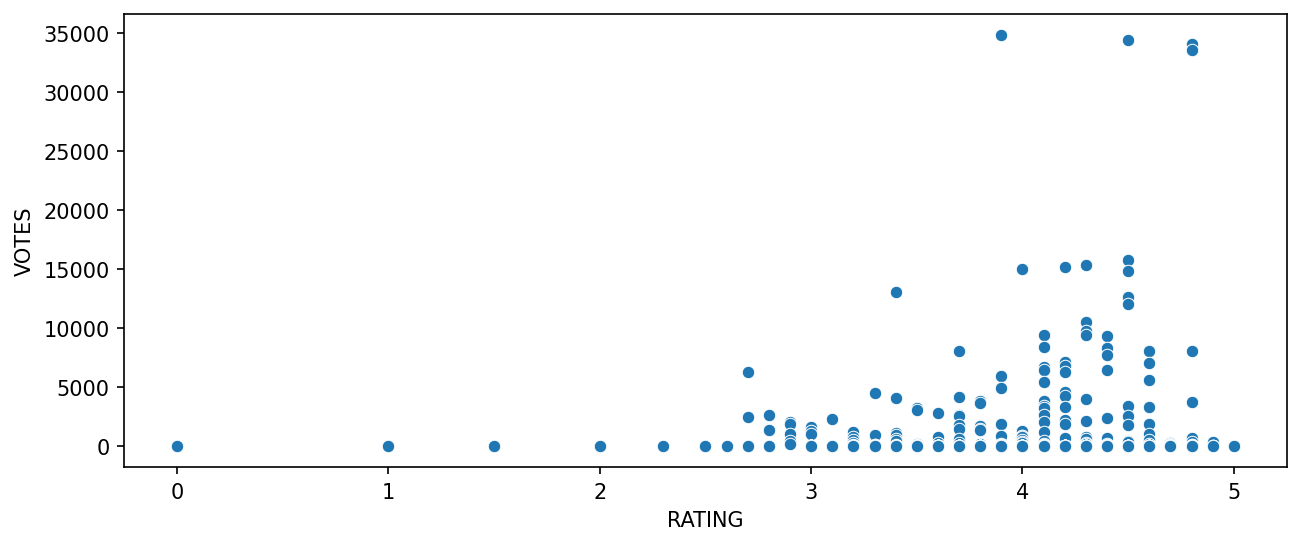

In [6]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=df,y='VOTES',x='RATING')

In [7]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


##CREATE A NEW COLUMN "YEAR"

In [8]:
title='Film Title Name (Year)'

In [9]:
title.split('(')[-1].replace(')','')

'Year'

In [10]:
df['YEAR']=df['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))


KeyError: ignored

In [12]:
df['YEAR'].value_counts()

2015    478
2014     23
1         7
1964      1
2016      1
Name: YEAR, dtype: int64

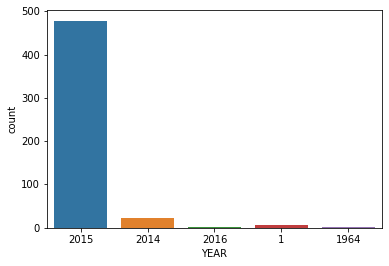

In [13]:
sns.countplot(data=df,x='YEAR')

##HIGHEST NUMBER OF VOTES

In [14]:
df.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [15]:
len(df[df['VOTES']==0])

73

In [16]:
fan_review=df[df['VOTES']>0]

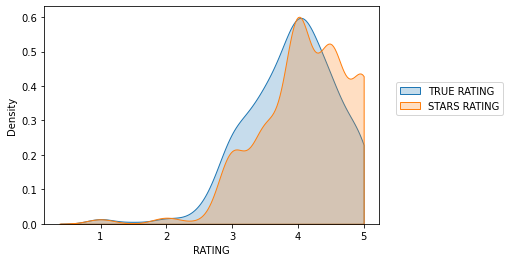

In [17]:
sns.kdeplot(data=fan_review,x='RATING',clip=[0,5],fill=True,label='TRUE RATING')
sns.kdeplot(data=fan_review,x='STARS',clip=[0,5],fill=True,label='STARS RATING')
plt.legend(loc=(1.05,0.5))


In [18]:
fan_review['STARS_DIFF']=fan_review['STARS']-fan_review['RATING']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
fan_review

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
432,That Sugar Film (2015),5.0,5.0,1,2015,0.0
433,The Intern (2015),5.0,5.0,1,2015,0.0
434,The Park Bench (2015),5.0,5.0,1,2015,0.0
435,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


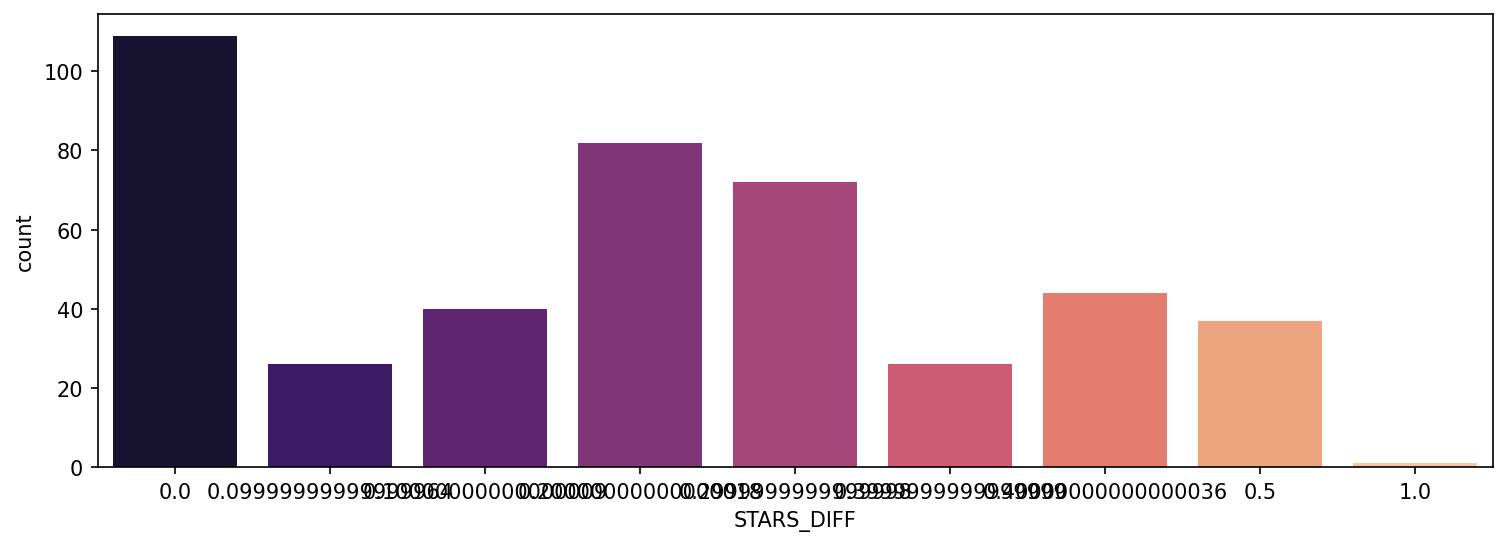

In [20]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_review,x='STARS_DIFF',palette='magma')

In [21]:
fan_review[fan_review['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


##COMARSION OF FANDANGO RATINGS TO OTHER SITES

In [22]:
all_sites=pd.read_csv("/content/fandango_score_comparison.csv")

In [23]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [24]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,3.259589,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,0.755356,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,1.200000,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,2.850000,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,3.425000,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,3.750000,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,4.800000,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


##ROTTEN TOMATOES

(0.0, 100.0)

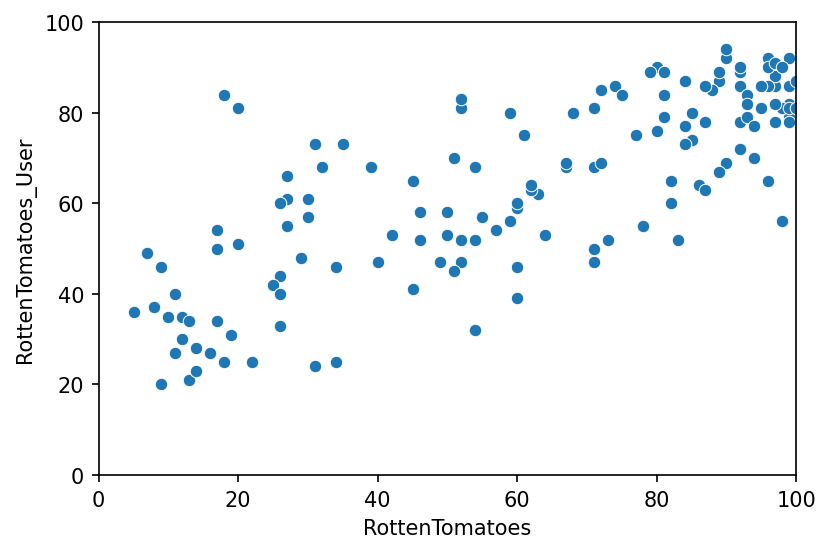

In [27]:
plt.figure(dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

##CREATE A NEW COLUMNS BASED OF THE DIFFERENCE BET CRITICS RATINGS AND USER RATINGS FOR ROTTEN TOMATOES

In [28]:
all_sites['Rotten_diff']=all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [29]:
all_sites['Rotten_diff'].apply(abs).mean()

15.095890410958905

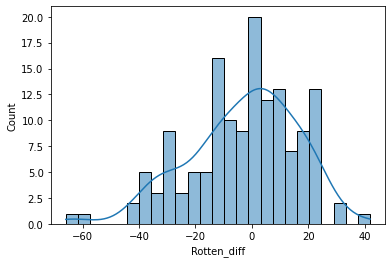

In [30]:
sns.histplot(data=all_sites,x='Rotten_diff',kde=True,bins=25)

##top 5movies users rated than critics on average

In [31]:
all_sites.nsmallest(5,'Rotten_diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

In [32]:
all_sites.nlargest(5,'Rotten_diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

#METACRITIC

(0.0, 10.0)

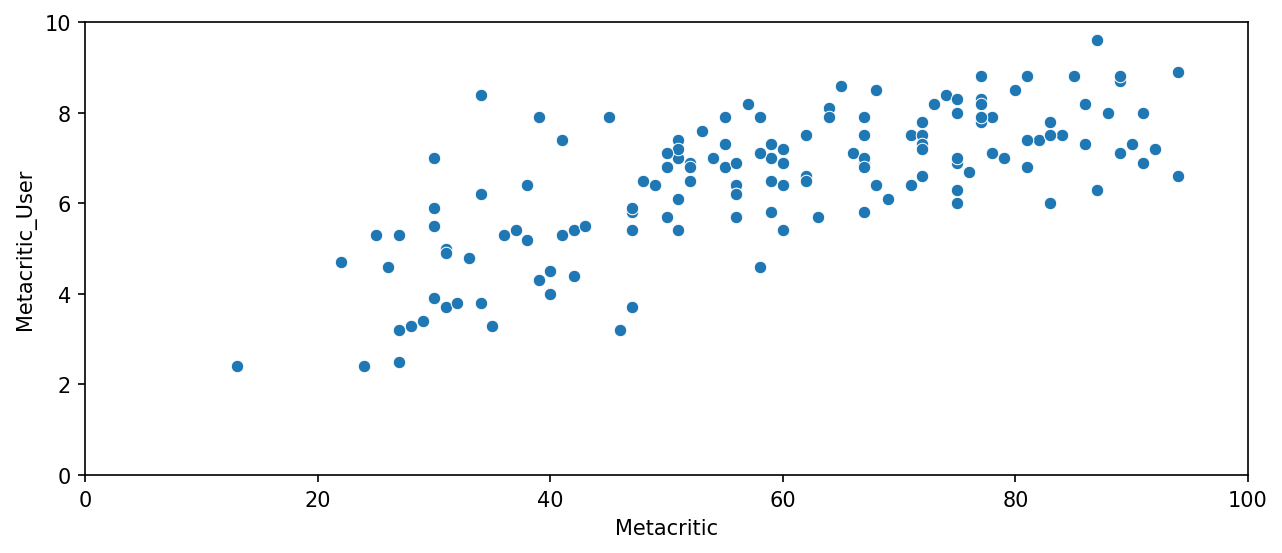

In [34]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

##IMDB

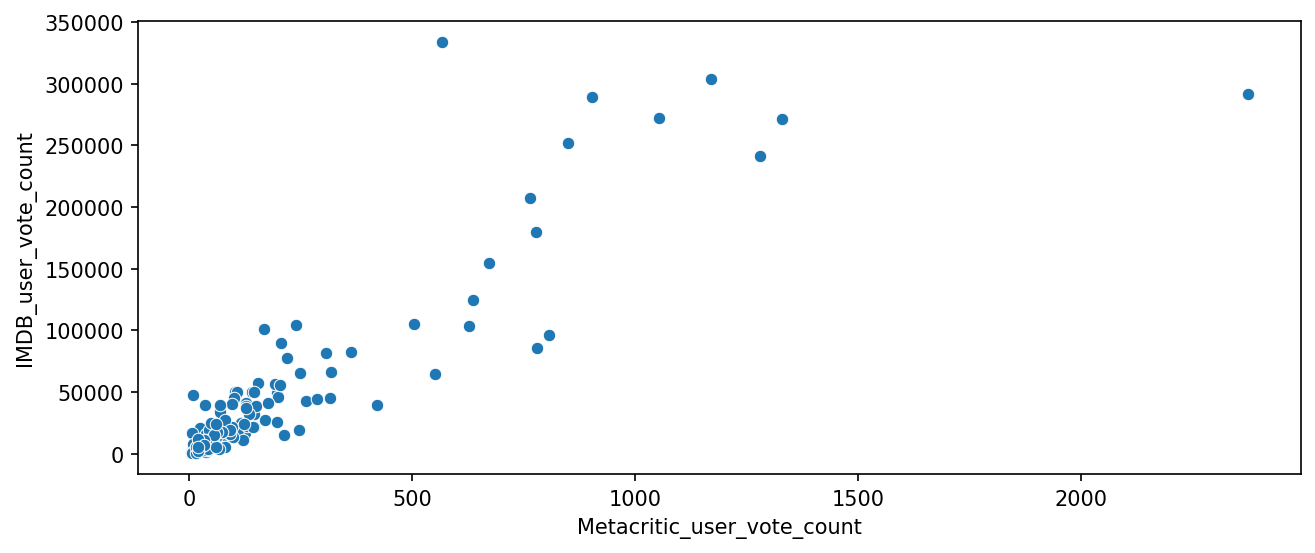

In [36]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [37]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,4.5,4.3,4.85,4.4,4.45,4.35,4.15,5.0,4.5,4.5,4.5,4.0,2375,292023,10509,0.2,9


In [38]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,5.0,4.6,4.5,4.6,3.65,4.1,4.05,4.5,4.5,3.5,4.0,4.0,566,334164,8055,0.4,-2


In [42]:
df_merge=pd.merge(df,all_sites,on='FILM',how='inner')
df_merge

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,4.0,3.9,1.25,2.10,2.30,1.60,2.10,1.5,2.0,2.5,1.5,2.0,778,179506,34846,0.1,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,4.5,4.5,3.55,4.05,2.95,3.50,3.65,3.5,4.0,3.0,3.5,3.5,1281,241807,34390,0.0,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,5.0,4.8,3.60,4.25,3.60,3.30,3.70,3.5,4.5,3.5,3.5,3.5,850,251856,34085,0.2,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,5.0,4.8,4.05,4.20,3.35,3.40,3.70,4.0,4.0,3.5,3.5,3.5,764,207211,33538,0.2,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,4.5,4.5,4.90,4.50,4.70,4.45,4.30,5.0,4.5,4.5,4.5,4.5,807,96252,15749,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,3.40,3.20,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,4.0,3.6,4.75,4.05,4.35,3.15,3.50,5.0,4.0,4.5,3.0,3.5,18,1107,38,0.4,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4.5,4.2,4.65,4.20,3.35,3.50,3.90,4.5,4.0,3.5,3.5,4.0,4,732,38,0.3,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,4.0,3.9,4.75,4.30,4.30,3.65,3.70,5.0,4.5,4.5,3.5,3.5,14,696,36,0.1,9


##NORAMLISE COLUMNS TO FANDANGO STARS AND RATINGS

In [45]:
df_merge.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Fandango_Stars                     5.0
Fandango_Ratingvalue               4.8
RT_norm                            5.0
RT_user_norm                       4.7
Metacritic_norm                    4.7
Metacritic_user_nom                4.8
IMDB_norm                          4.3
RT_norm_round                      5.0
RT_user_norm_round                 4.5
Metacritic_norm_round              4.5
Metacritic_user_norm_round         5.0
IMDB_norm_round                    4.5
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Fandango_votes                 34846.0
Fandango_Difference                0.5
Rotten_diff                       42.0
Name: max, dtype: float64

In [46]:
df_merge.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Fandango_Stars', 'Fandango_Ratingvalue', 'RT_norm', 'RT_user_norm',
       'Metacritic_norm', 'Metacritic_user_nom', 'IMDB_norm', 'RT_norm_round',
       'RT_user_norm_round', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Fandango_votes',
       'Fandango_Difference', 'Rotten_diff'],
      dtype='object')

In [47]:
norm_scores=df_merge[['STARS','RATING','RT_norm','RT_user_norm','Metacritic_norm_round','Metacritic_user_norm_round', 'IMDB_norm_round']]


In [48]:
norm_scores.head()

,STARS,RATING,RT_norm,RT_user_norm,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round
0,4.0,3.9,1.25,2.10,2.5,1.5,2.0
1,4.5,4.5,3.55,4.05,3.0,3.5,3.5
2,5.0,4.8,3.60,4.25,3.5,3.5,3.5
3,5.0,4.8,4.05,4.20,3.5,3.5,3.5
4,4.5,4.5,4.90,4.50,4.5,4.5,4.5


In [52]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


##COMPARING DISTURBUTION OF SCORES ACROSS SITES

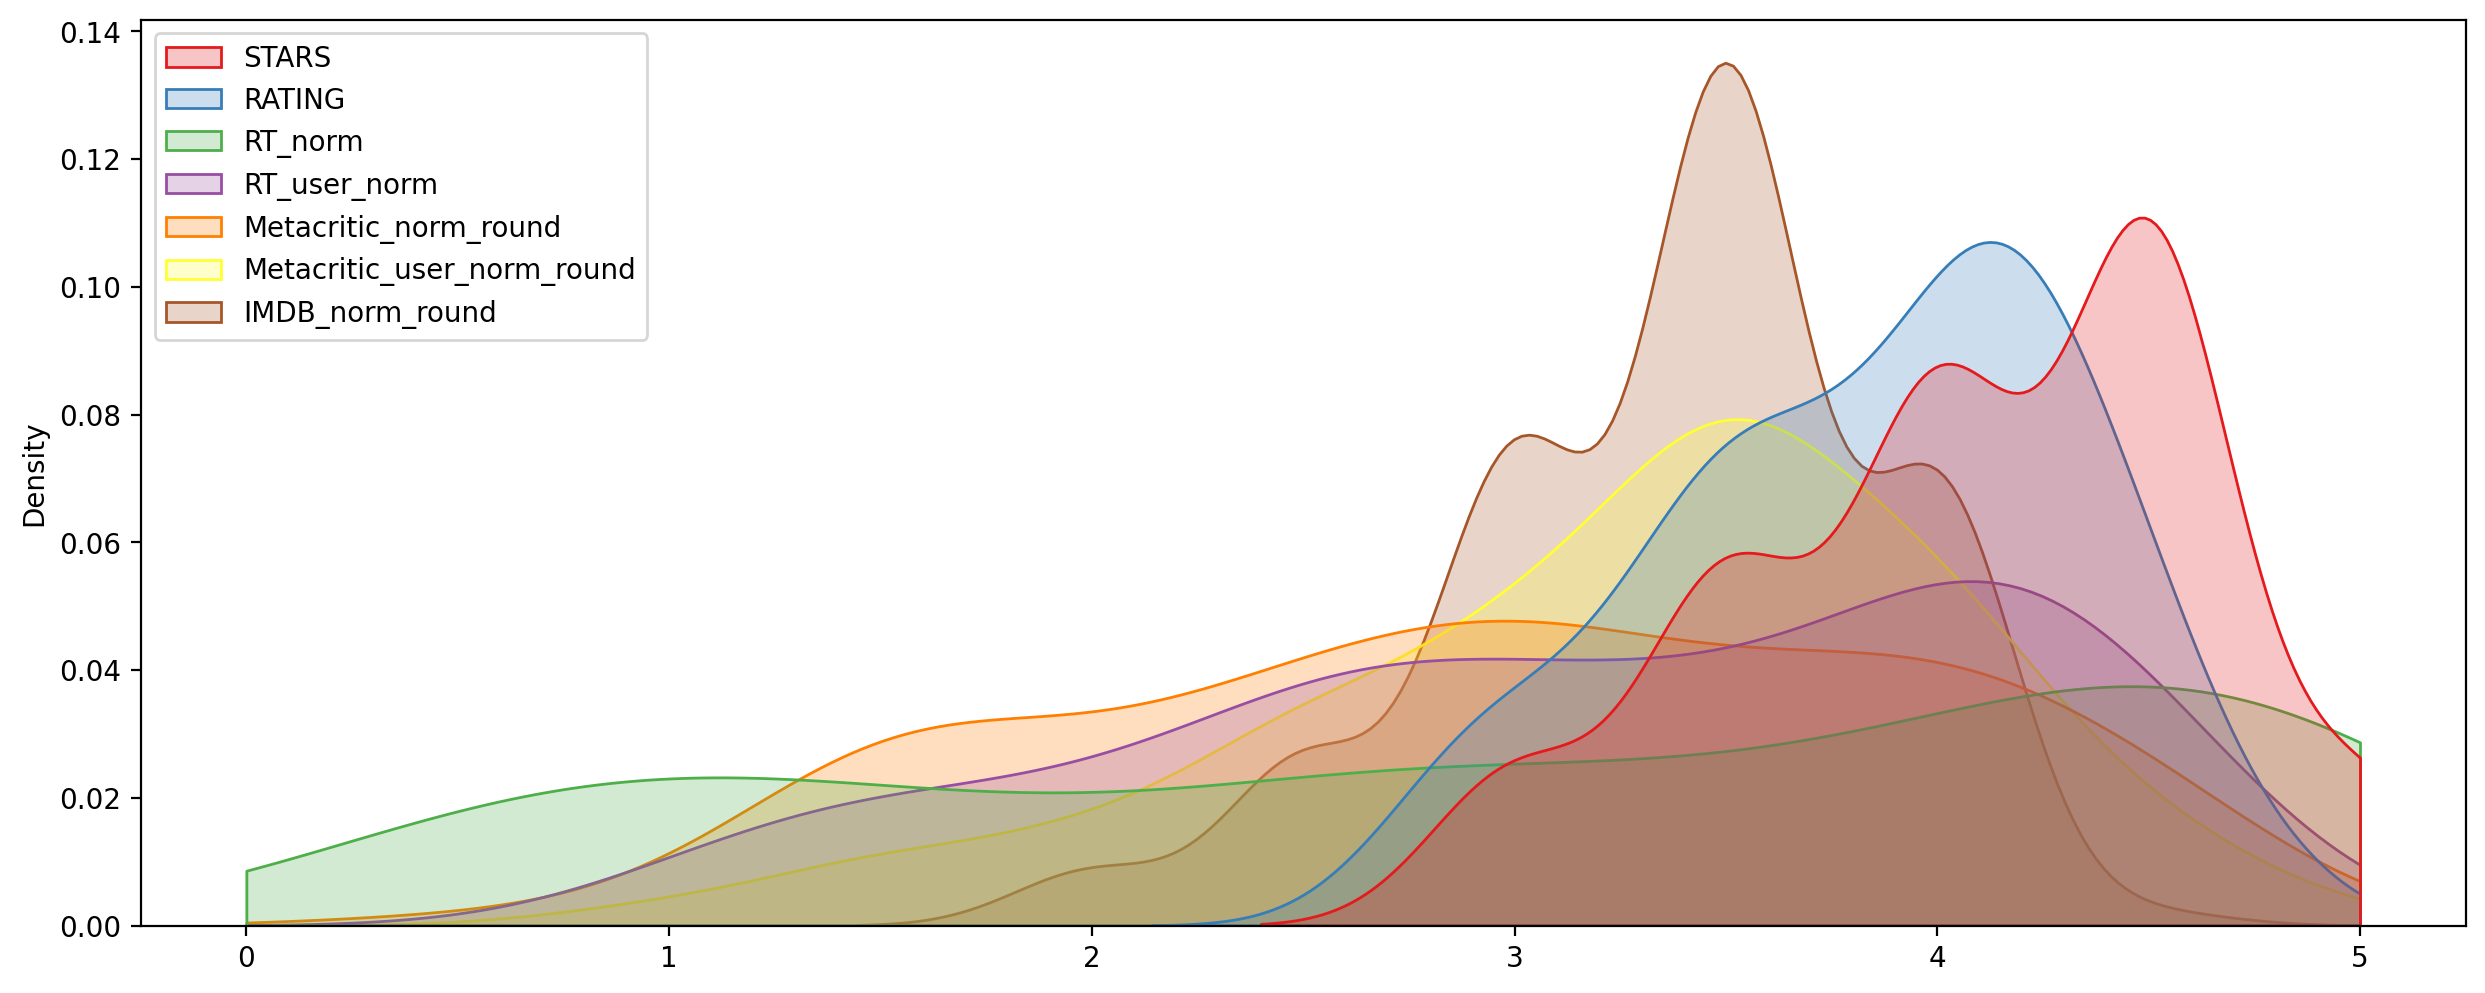

In [57]:
fig,ax=plt.subplots(figsize=(15,6),dpi=200)



sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")

##WORST MOVIES RATED ACROSS ALL PLATFORMS

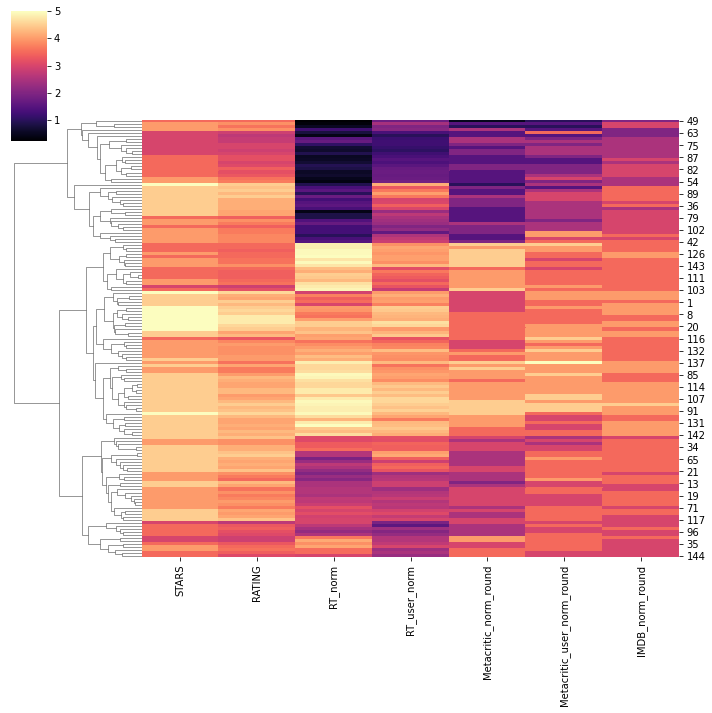

In [58]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [59]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_norm', 'RT_user_norm', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round'],
      dtype='object')

In [60]:
norm_films=df_merge[['FILM','STARS', 'RATING', 'RT_norm', 'RT_user_norm', 'Metacritic_norm_round',
       'Metacritic_user_norm_round', 'IMDB_norm_round']]

In [64]:
worst_films=norm_films.nsmallest(10,'RT_norm')
worst_films

,FILM,STARS,RATING,RT_norm,RT_user_norm,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.25,1.80,0.5,1.0,2.0
84,Hitman: Agent 47 (2015),4.0,3.9,0.35,2.45,1.5,1.5,3.0
54,Hot Pursuit (2015),4.0,3.7,0.40,1.85,1.5,2.0,2.5
25,Taken 3 (2015),4.5,4.1,0.45,2.30,1.5,2.5,3.0
28,Fantastic Four (2015),3.0,2.7,0.45,1.00,1.5,1.5,2.0
50,The Boy Next Door (2015),4.0,3.6,0.50,1.75,1.5,3.0,2.5
87,Unfinished Business (2015),3.5,3.2,0.55,1.35,1.5,2.0,2.5
88,The Loft (2015),4.0,3.6,0.55,2.00,1.0,1.0,3.0
77,Seventh Son (2015),3.5,3.2,0.60,1.75,1.5,2.0,3.0
78,Mortdecai (2015),3.5,3.2,0.60,1.50,1.5,1.5,3.0


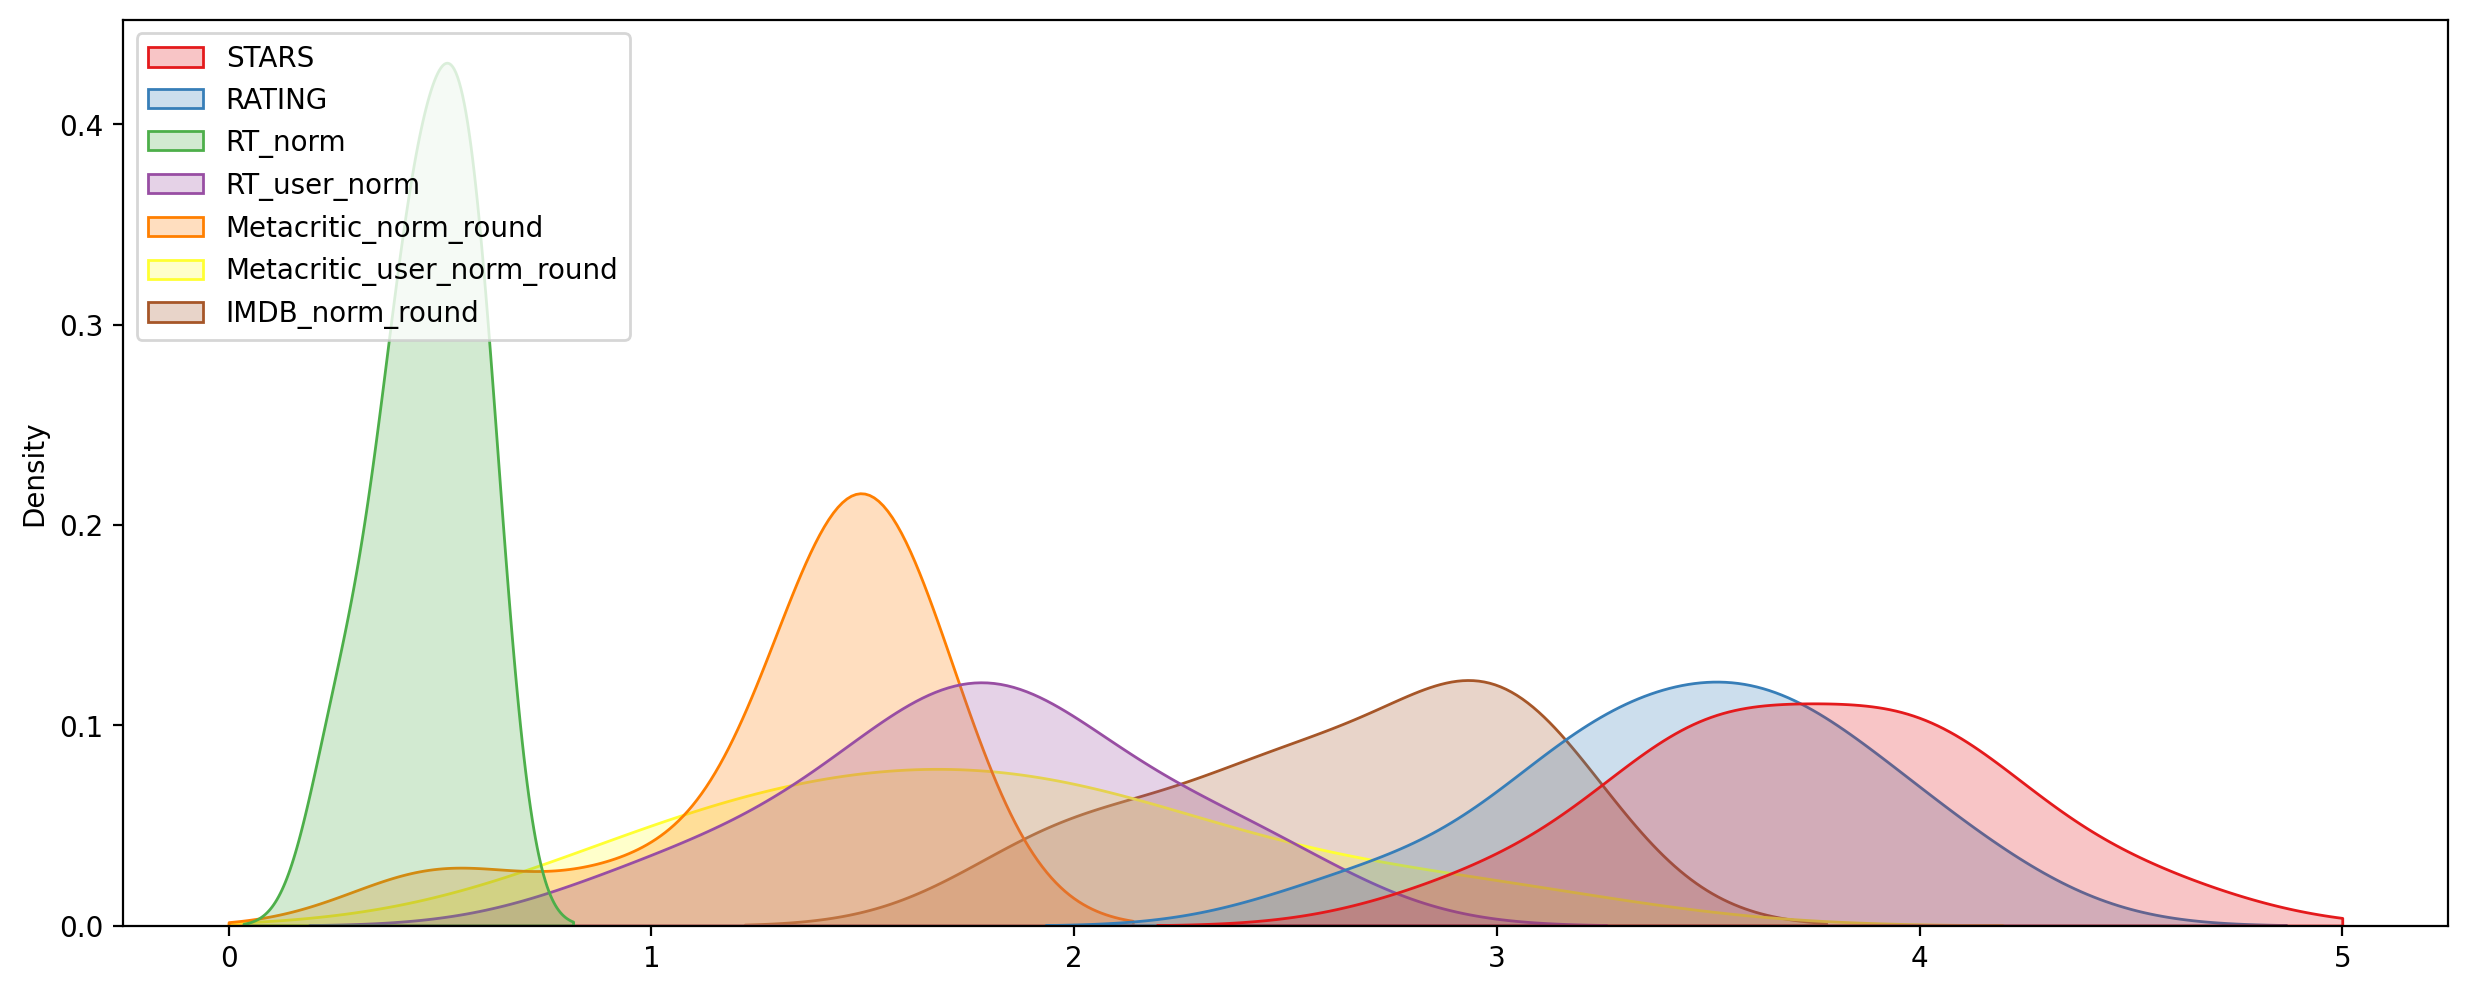

In [63]:
fig,ax=plt.subplots(figsize=(15,6),dpi=200)



sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")